In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('DatosAzcapo.txt', sep=',', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       52179 non-null  object 
 1   1       52179 non-null  object 
 2   2       52179 non-null  float64
 3   3       52179 non-null  float64
 4   4       52179 non-null  float64
 5   5       52179 non-null  float64
 6   6       52179 non-null  float64
 7   7       52179 non-null  float64
 8   8       52179 non-null  float64
 9   9       52179 non-null  float64
 10  10      52179 non-null  float64
 11  11      52179 non-null  float64
 12  12      52179 non-null  float64
dtypes: float64(11), object(2)
memory usage: 5.2+ MB


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4/4/2024 12:00:00 AM,4/4/2024 6:00:00 AM,28.692070,14.742066,13.950004,23.128830,19.350910,77.827011,28.035599,25.874756,33.960640,11.665325,5.025064
1,4/4/2024 12:01:00 AM,4/4/2024 6:01:00 AM,32.022658,14.771019,17.251640,23.148970,19.340763,77.817986,27.919699,25.910034,33.966431,11.671605,5.068029
2,4/4/2024 12:02:00 AM,4/4/2024 6:02:00 AM,32.219123,14.717249,17.501873,23.169109,19.335342,77.820869,27.938000,25.910950,33.988586,11.663702,5.003208
3,4/4/2024 12:03:00 AM,4/4/2024 6:03:00 AM,31.586301,14.659344,16.926957,23.169109,19.330561,77.814812,27.956299,25.925995,33.997185,11.670901,4.931069
4,4/4/2024 12:04:00 AM,4/4/2024 6:04:00 AM,32.534500,14.676922,17.857577,23.199320,19.308531,77.830132,27.956299,25.948059,34.013283,11.678738,5.000206


In [ ]:
df['fechas']=pd.to_datetime(df[0])
df=df.set_index('fechas')

<ipython-input-4-f5f18913dd5c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fechas']=pd.to_datetime(df[0])


In [ ]:
PM10=df[2]
PM25=df[3]
PMmix=df[4]
Temp=df[5]
Pres=df[6]
RH=df[7]

In [ ]:
variable=['$PM_{10}', '$PM_{2.5}', '$PM_{mix}', 'T', 'P', 'RH']

colors=['black', 'red', 'blue', 'green', 'orange', 'brown']

In [ ]:
def plot_var(var,index,lim_min,lim_max):
  plt.figure(figsize=(15,2))
  plt.plot(var.iloc[lim_min:lim_max],color=colors[index],label=variable[index])
  plt.xlabel('Tiempo', fontsize=12)
  plt.ylabel(f'{variable[index]}', fontsize=12)
  plt.legend()
  plt.grid(True)
  plt.show()

52179


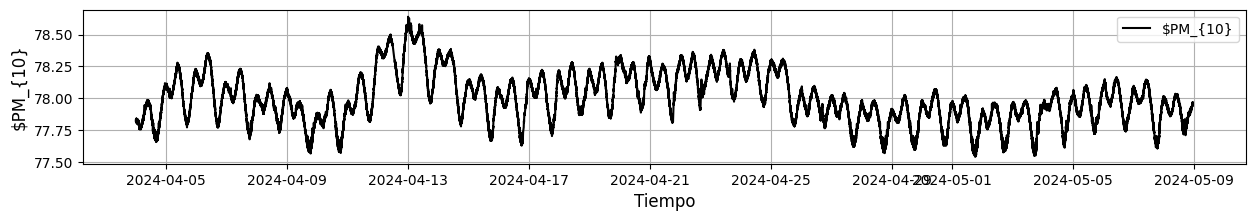

In [ ]:
print(len(df))
index=0
plot_var(RH,index,0,50000)

In [ ]:
df.skew(numeric_only=True)

,0
2,2.627921
3,0.689481
4,3.799422
5,1.763857
6,0.178861
7,0.272153
8,-0.895409
9,0.437827
10,1.702012
11,0.561093


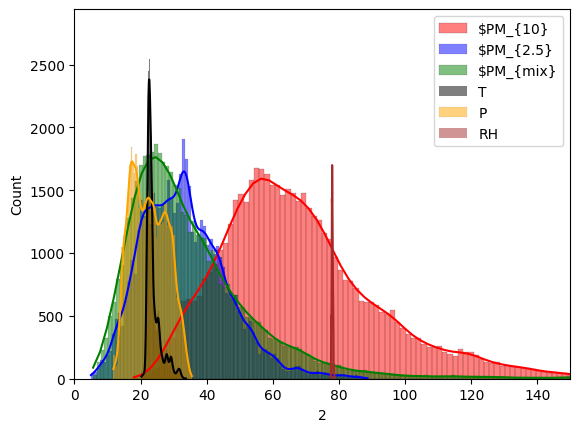

In [ ]:
sns.histplot(PM10, color='red', label='$PM_{10}',kde=True)
sns.histplot(PM25, color='blue', label='$PM_{2.5}',kde=True)
sns.histplot(PMmix, color='green', label='$PM_{mix}',kde=True)
sns.histplot(Temp, color='black', label='T',kde=True)
sns.histplot(Pres, color='orange', label='P',kde=True)
sns.histplot(RH, color='brown', label='RH',kde=True)
plt.xlim(0,150)
plt.legend(loc='upper right')
plt.show()

In [ ]:
df.kurt(numeric_only=True)

,0
2,17.602749
3,0.728258
4,28.249759
5,2.810165
6,-0.996193
7,-0.165019
8,-0.111215
9,6.155148
10,2.888641
11,46.158682


In [ ]:
correlation0=df[3].corr(df[2], method='spearman')
correlation1=df[3].corr(df[4], method='spearman')
correlation2=df[3].corr(df[5], method='spearman')
correlation3=df[3].corr(df[6], method='spearman')
correlation4=df[3].corr(df[7], method='spearman')

print(f"Correlación PM2.5 y PM10: {correlation0}")
print(f"Correlación PM2.5 y PMmix: {correlation1}")
print(f"Correlación PM2.5 y Temp: {correlation2}")
print(f"Correlación PM2.5 y Press: {correlation3}")
print(f"Correlación PM2.5 y RH: {correlation4}")


Correlación PM2.5 y PM10: 0.6628288269857316
Correlación PM2.5 y PMmix: 0.19378730709920722
Correlación PM2.5 y Temp: 0.22574686132275
Correlación PM2.5 y Press: 0.03153504569097056
Correlación PM2.5 y RH: 0.005900923429563776


In [ ]:
Data_in=np.column_stack([Temp,Pres])
Data_out=np.column_stack([PM25])
print(Data_in)
print(len(Data_in))
print(Data_out)
print(len(Data_out))

[[23.12882996 19.35091019]
 [23.14896965 19.34076309]
 [23.16910934 19.33534241]
 ...
 [22.4742794  27.89101791]
 [22.5044899  27.69476509]
 [22.55483818 27.57023621]]
52179
[[14.74206591]
 [14.77101855]
 [14.71724936]
 ...
 [34.84037096]
 [34.57772912]
 [34.41331946]]
52179


In [ ]:
Data_out.shape[1]

1

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Dense(3, activation='linear', input_shape=(Data_in.shape[1],)),tf.keras.layers.Dense(1, activation='linear')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(Data_in, Data_out, test_size=0.2, random_state=42)

In [ ]:
print(Data_in[:5])
print(X_train[:5])

[[23.12882996 19.35091019]
 [23.14896965 19.34076309]
 [23.16910934 19.33534241]
 [23.16910934 19.33056068]
 [23.19931984 19.30853081]]
[[22.60518837 24.13035774]
 [23.23959923 16.16941452]
 [22.32322884 27.22885513]
 [28.69753838 13.59325886]
 [22.65553856 23.71559715]]


In [ ]:
train_split=int(0.7*len(Data_in))
print(train_split)
X_train, y_train=Data_in[0:train_split],Data_out[0:train_split]
X_test, y_test=Data_in[train_split:len(Data_in)],Data_out[train_split:len(Data_in)]

36525


In [ ]:
print(Data_in[0:train_split])
X_train

[[23.12882996 19.35091019]
 [23.14896965 19.34076309]
 [23.16910934 19.33534241]
 ...
 [22.53469849 29.00280762]
 [22.28294945 29.18952942]
 [22.09161949 29.4770565 ]]


array([[23.12882996, 19.35091019],
       [23.14896965, 19.34076309],
       [23.16910934, 19.33534241],
       ...,
       [22.53469849, 29.00280762],
       [22.28294945, 29.18952942],
       [22.09161949, 29.4770565 ]])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error' )

model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
train_predictions=model.predict(X_train)
print(f'Reproducción de los datos de entrenamiento:\n{train_predictions}')

print(X_train)

test_predictions=model.predict(X_test)
print(f'Predicción de datos:\n{train_predictions}')


1142/1142 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Reproducción de los datos de entrenamiento:
[[28.00748 ]
 [28.029543]
 [28.052013]
 ...
 [28.17178 ]
 [27.90122 ]
 [27.70829 ]]
[[23.12882996 19.35091019]
 [23.14896965 19.34076309]
 [23.16910934 19.33534241]
 ...
 [22.53469849 29.00280762]
 [22.28294945 29.18952942]
 [22.09161949 29.4770565 ]]
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicción de datos:
[[28.00748 ]
 [28.029543]
 [28.052013]
 ...
 [28.17178 ]
 [27.90122 ]
 [27.70829 ]]


In [ ]:
print(len(y_train))
print(len(train_predictions))

36525
36525


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse=mean_squared_error(y_train, train_predictions)
mae=mean_absolute_error(y_train, train_predictions)
r2=r2_score(y_train, train_predictions)
print("Métricas Interpolación:")
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

mse=mean_squared_error(y_test, test_predictions)
mae=mean_absolute_error(y_test, test_predictions)
r2=r2_score(y_test, test_predictions)
print("Métricas Extrapolación:")
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')


Métricas Interpolación:
MSE: 126.645097036737
MAE: 8.922344561305685
R2: 0.046752051505385195
Métricas Extrapolación:
MSE: 283.3663856475098
MAE: 12.963110807776951
R2: -0.9978444375866486


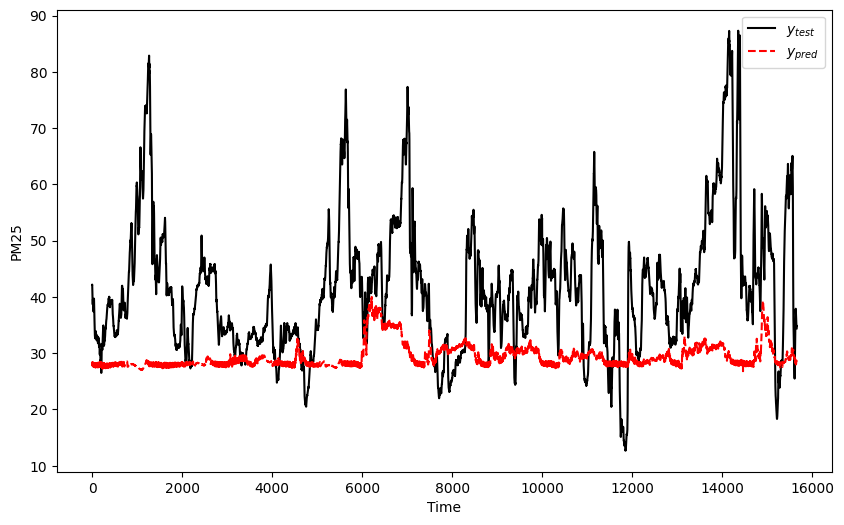

In [ ]:
pl=np.vstack((y_train, y_test))

plt.figure(figsize=(10, 6))
plt.plot(y_test, '-', color='black', label='$y_{test}$')
plt.plot(test_predictions, '--', color='red', label='$y_{pred}$')
plt.xlabel('Time')
plt.ylabel('PM25')
#plt.xlim(10000,20000)
plt.legend()
plt.show()

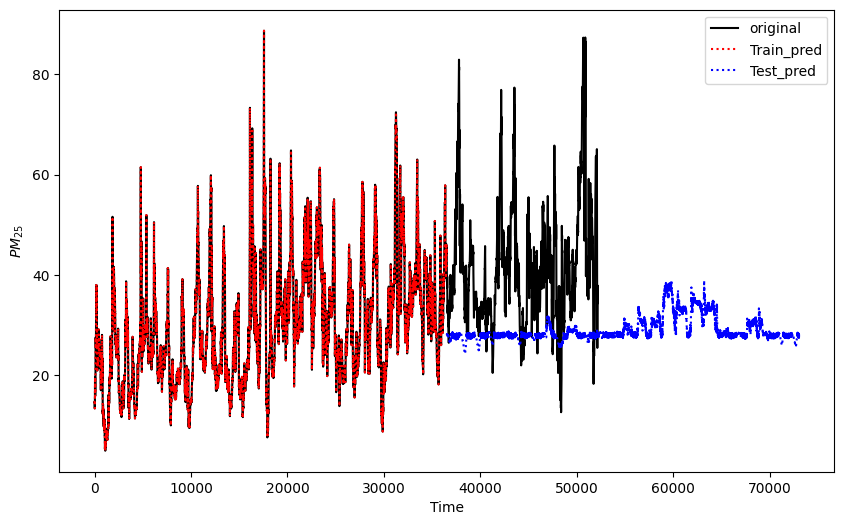

In [ ]:
pl1=np.vstack((y_train, train_predictions))

plt.figure(figsize=(10, 6))

plt.plot(Data_out,color='black',label='original')
plt.plot(range(len(y_train)), pl1[:len(y_train)],':',color='red',label='Train_pred')
plt.plot(range(len(y_train), len(pl1)),pl1[len(y_train):],':',color='blue', label='Test_pred')
plt.xlabel('Time')
plt.ylabel('$PM_{25}$')
plt.legend()
plt.show()

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Dense(3,activation='linear', input_shape=(Data_in.shape[1],)),tf.keras.layers.Dense(1,activation='linear')])
opt=tf.keras.optimizers.Adagrad(learning_rate=0.1)

model.compile(optimizer=opt, loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train,y_train,epochs=50,verbose=0)

In [ ]:
train_predictions=model.predict(X_train)
print(f'Reproducción de los datos de entrenamiento:\n {train_predictions}')
test_predictions=model.predict(X_test)
print(f'Validación del modelo:\n {test_predictions}')

1142/1142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Reproducción de los datos de entrenamiento:
 [[28.784698]
 [28.807226]
 [28.830215]
 ...
 [29.035114]
 [28.759373]
 [28.564056]]
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validación del modelo:
 [[28.521704]
 [28.562292]
 [28.638472]
 ...
 [28.855783]
 [28.871864]
 [28.918482]]


In [ ]:
mse=mean_squared_error(y_train, train_predictions)
mae=mean_absolute_error(y_train, train_predictions)
r2=r2_score(y_test, test_predictions)
print("Métricas Interpolación:")
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

mse=mean_squared_error(y_test, test_predictions)
mae=mean_absolute_error(y_test, test_predictions)
r2=r2_score(y_test, test_predictions)
print("Métricas Extrapolación:")
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

Métricas Interpolación:
MSE: 126.08945161966032
MAE: 8.977586940867258
R2: -0.8584462793754339
Métricas Extrapolación:
MSE: 263.59469996714336
MAE: 12.31393567559192
R2: -0.8584462793754339


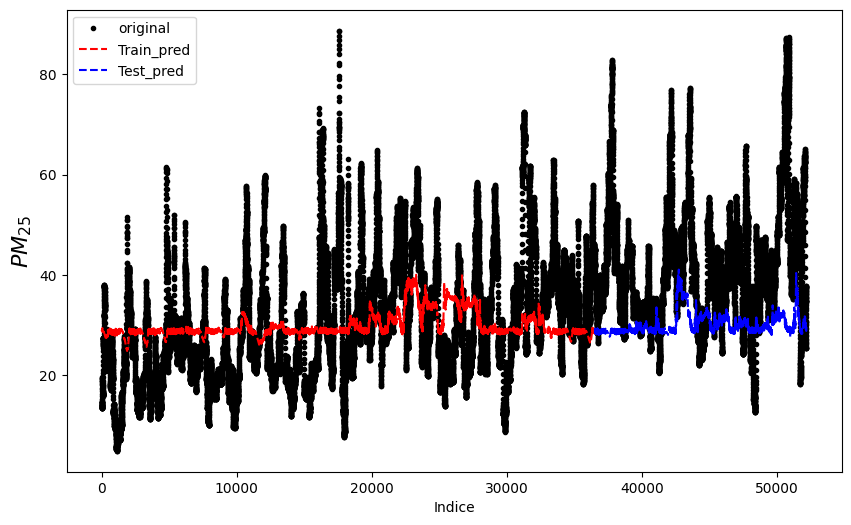

In [ ]:
pl1=np.vstack((train_predictions, test_predictions))

plt.figure(figsize=(10, 6))

plt.plot(Data_out,'.',color='black',label='original')
plt.plot(range(len(y_train)), pl1[:len(y_train)],'--',color='red',label='Train_pred')
plt.plot(range(len(y_train), len(pl1)),pl1[len(y_train):],'--',color='blue', label='Test_pred')
plt.xlabel('Indice')
plt.ylabel('$PM_{25}$',fontsize=16)
plt.legend()
plt.show()

In [ ]:
Data_in=np.column_stack([RH,PM10,PMmix])

In [ ]:
train_split=int(0.7*len(Data_in))
print(train_split)
X_train, y_train=Data_in[0:train_split], Data_out[0:train_split]
X_test, y_test=Data_in[train_split:len(Data_in)],Data_out[train_split:len(Data_in)]

36525


In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Dense(3,activation='linear', input_shape=(Data_in.shape[1],)),tf.keras.layers.Dense(1,activation='linear')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
train_predictions=model.predict(X_train)
print(f'Reproducción de los datos de entrenamiento:\n {train_predictions}')
test_predictions=model.predict(X_test)
print(f'Validación del modelo:\n{test_predictions}')

1142/1142 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Reproducción de los datos de entrenamiento:
 [[14.741463]
 [14.770584]
 [14.716803]
 ...
 [42.072243]
 [42.15704 ]
 [42.174713]]
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validación del modelo:
[[42.135258]
 [42.191093]
 [42.074287]
 ...
 [34.83909 ]
 [34.57633 ]
 [34.41203 ]]


In [ ]:
from scipy.stats import spearmanr

mse=mean_squared_error(y_train, train_predictions)
mae=mean_absolute_error(y_train, train_predictions)
r2=r2_score(y_train, train_predictions)
print("Métricas Interpolación:")
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

mse=mean_squared_error(y_test, test_predictions)
mae=mean_absolute_error(y_test, test_predictions)
r2=r2_score(y_test, test_predictions)
print("Métricas Extrapolación:")
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

Métricas Interpolación:
MSE: 0.0031007467451070704
MAE: 0.0036457279568502684
R2: 0.999976660916666
Métricas Extrapolación:
MSE: 0.0022528899116124644
MAE: 0.002742031941857802
R2: 0.9999841162402939


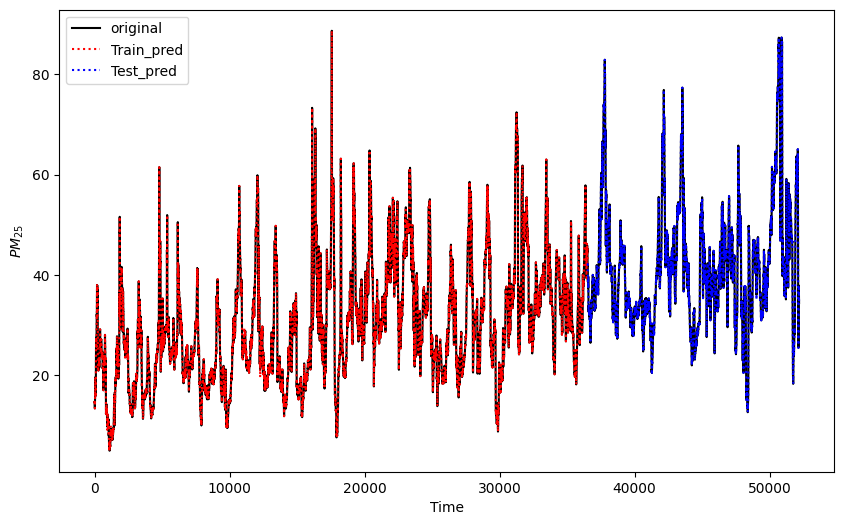

In [ ]:
pl1=np.vstack((train_predictions, test_predictions))

plt.figure(figsize=(10, 6))

plt.plot(Data_out,color='black',label='original')
plt.plot(range(len(y_train)), pl1[:len(y_train)],':',color='red',label='Train_pred')
plt.plot(range(len(y_train), len(pl1)),pl1[len(y_train):],':',color='blue', label='Test_pred')
plt.xlabel('Time')
plt.ylabel('$PM_{25}$')
plt.legend()
plt.show()

In [ ]:
Data_in=np.column_stack([RH,PM10,PMmix])

In [ ]:
K_folds=10
Fold_len=len(Data_in)/K_folds
Folds=[]
sets=[]
for i in range(K_folds):
  sets.append([round(i*Fold_len),round((i+1)*Fold_len)])
  Folds.append(Data_in[round(i*Fold_len):round((i+1)*Fold_len)])

sets.append([len(Data_in),0])
sets=np.array(sets)

print(sets)

[[    0  5218]
 [ 5218 10436]
 [10436 15654]
 [15654 20872]
 [20872 26090]
 [26090 31307]
 [31307 36525]
 [36525 41743]
 [41743 46961]
 [46961 52179]
 [52179     0]]


In [ ]:
def Set(i,Data_in,Data_out,porcentaje):

  train_split=int(porcentaje*len(Data_in))
  print(train_split)
  X_train, y_train=Data_in[sets[0,0]:sets[i+1,0]], Data_out[sets[0,0]:sets[i+1,0]]
  X_test, y_test=Data_in[sets[i,1]:sets[i+1,1]], Data_out[sets[i,0]:sets[i+1,1]]

  plt.plot(Data_out,'.', color='black')
  plt.plot(range(len(y_train)),pl1[:len(y_train)],'--',color='red',label='Train')
  plt.plot(range(len(y_test),len(pl1)),pl1[len(y_test):],'--',color='blue',label='Test')
  plt.plot(X_train[:,1],'--',color='red')
  plt.legend()
  plt.show()

In [ ]:
def Set(i, Data_in, Data_out, porcentaje,flag):
  if i>=len(sets)-1:
    raise ValueError("El valor de 'i' es demasiado grande para el número de conjuntos en 'sets'.")

    train_start,train_end=sets[0,0],sets[i,1]
    test_start,test_end=sets[i,1],sets[i+1,1]

    X_train,y_train=Data_in[train_start:train_end],Data_out[train_start:train_end]
    X_test,y_test=Data_in[test_start:test_end], Data_out[test_start:test_end]

    train_indices=np.arange(train_start,train_end)
    test_indices=np.arange(test_start,test_end)

    if flag == True:
      plt.plot(Data_out,'.',color='black',label='Datos originales')
      plt.plot(train_indices,y_train,'--',color='red',label='Train')
      plt.plot(test_indices,y_test,'--',color='blue',label='Test')

      plt.legen()
      plt.show()
    return X_train,y_train,X_test,y_test

In [ ]:
MSE=[]
R2=[]
for i in range(len(sets)-2):
    #print(sets[i+1,0],sets[K_folds-1,1])
    X_train, y_train, X_test,y_test = Set(i,Data_in , Data_out, 0.7,True)
    model.fit(X_train, y_train, epochs=50, verbose=0)
    test_predictions=model.predict(X_test)
    MSE.append(mean_squared_error(y_test, test_predictions))
    rr=r2_score(y_test, test_predictions)
    R2.append(rr)
    plt.plot(y_test,color='blue')
    plt.plot(test_predictions,color='red')
    plt.show()

TypeError: cannot unpack non-iterable NoneType object